<a href="https://colab.research.google.com/github/molabokchi/bokchi_open_lab/blob/main/deepdriver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 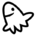 deepdriver quickstart!

welecome to deepdriver! 😀

You can refer to the guide document.
https://bokchi.gitbook.io/deepdriver-ce/

# 0. 💻 install deepdriver

In [1]:
pip install deepdriver==0.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 KB 35.3 MB/s eta 0:00:00
  Created wheel for assertpy: filename=assertpy-1.1-py3-none-any.whl size=42917 sha256=1fd2c9281528466b51372fb68ce80a5d3fc0a53398384b867415d0efe67b2929
  Stored in directory: /root/.cache/pip/wheels/57/86/c9/1310be6ddfb540daa0bf1ac204526837aa0a8b0e79f32855ff
Successfully built assertpy
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency confli

#1. ➕ import deepdriver



In [2]:
import deepdriver

#2. ⚙ deepdriver server setting

In [3]:
deepdriver.setting(http_host="quick-experience.bokchi.com:9011" ,grpc_host="quick-experience.bokchi.com:19051")

#3. 🔌 log in to deepdriver

In [4]:
deepdriver.login(key="MjQ1ZjgyY2YwZWExZjEzYWFhOTg0MTJjOTI4ZjRjYzdlMjk4ZTRlZDc4N2ZlNGQ2ODNkZjE3MWI2OTVhMGVlYw==")

True

#4. 🥼 create experiment and run

In [5]:
epoch =10

In [6]:
def make_exp_name():
  import socket
  from datetime import datetime
  host_name = socket.gethostname()
  date = datetime.today().strftime("%Y%m%d") 

  return "exp" + "_" +host_name +"_"+date

In [7]:
# experiment init & config hyperparam
deepdriver.init(exp_name= make_exp_name(), 
                config={ 'architecture':"CNN", 'epoch': epoch, 'batch_size': 32, 'hidden_layer':128, 'learning_rate':0.01})

2023-01-10 03:54:01,640 INFO [deepdriver] [experiment.py:21] - DeepDriver initialized
Team Name=molamola.babo
Exp Name=exp_768f4205d243_20230110
Run Name=run-1
Run URL=http://quick-experience.bokchi.com:9111/experi/molamola.babo/exp_768f4205d243_20230110/run-1/run/chart


INFO:deepdriver:DeepDriver initialized
Team Name=molamola.babo
Exp Name=exp_768f4205d243_20230110
Run Name=run-1
Run URL=http://quick-experience.bokchi.com:9111/experi/molamola.babo/exp_768f4205d243_20230110/run-1/run/chart


#5. 📚 train your code and send log

In [8]:
import random
accuracy = [ random.uniform(0.7+0.02*i, 1)  for i in range(epoch)]
train_loss = [ random.uniform(0.1,  0.2-0.01*i)  for i in range(epoch)]
val_accuracy =[ random.uniform(0.7+0.02*i, 1)  for i in range(epoch)]
val_loss = [ random.uniform(0.2,  0.3-0.01*i)  for i in range(epoch)]

In [9]:
for i in range(epoch):
    # send train log
    deepdriver.log({'acc': accuracy[i], 'loss': train_loss[i], 'val_acc': val_accuracy[i],'val_loss': val_loss[i]})

#6. ⬆ upload artifact(data)

In [10]:
arti = deepdriver.Artifacts(name="sample",type="dataset")

In [11]:
arti.add("/content/sample_data")

In [12]:
[ent.path for ent  in arti.entry_list]

['anscombe.json',
 'README.md',
 'mnist_train_small.csv',
 'mnist_test.csv',
 'california_housing_test.csv',
 'california_housing_train.csv']

In [13]:
deepdriver.upload_artifact(arti)

Uploading: [./sample_data/california_housing_train.csv] |██████████████████████████████| [100.0%] [6/6]

True

#7. ⬇ download artifact(data)

In [14]:
arti2 = deepdriver.get_artifact(name="sample",type="dataset")

2023-01-10 03:54:28,470 INFO [deepdriver] [run.py:38] - artifact is got! 
 artifact id :{8}


INFO:deepdriver:artifact is got! 
 artifact id :{8}


In [15]:
arti2.download()

Downloading: [./deepdriver/artifact/8/V1/mnist_train_small.csv] |██████████████████████████████| [100.0%] [6/6]

'./deepdriver/artifact/8'

#8. 📊 visualize train result

In [16]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])

In [17]:
line =deepdriver.line(df,"step","acc")

In [18]:
deepdriver.visualize(line)

In [19]:
df =deepdriver.DataFrame(columns=["step","loss"], data=[ [idx, loss] for idx, loss in enumerate(train_loss)])

In [20]:
line =deepdriver.line(df,"step","loss")

In [21]:
deepdriver.visualize(line)

In [22]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])

In [23]:
historgram = deepdriver.histogram(df,"step","acc")

In [24]:
deepdriver.visualize(historgram)

In [25]:
scatter = deepdriver.scatter(df,"step","acc")

In [26]:
deepdriver.visualize(scatter)

#9. 📈 send log for chart & table

In [27]:
df =deepdriver.DataFrame(columns=["step","loss"], data=[ [idx, loss] for idx, loss in enumerate(train_loss)])
line =deepdriver.line(df,"step","loss")
deepdriver.log({"my_line_chart":line})

Uploading: [./deepdriver/run/31/chart/my_line_chart.CHART.json] |██████████████████████████████| [100.0%] [1/1]

True

In [28]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])
historgram = deepdriver.histogram(df,"step","acc")
deepdriver.log({"my_histogram_chart":historgram})

Uploading: [./deepdriver/run/31/chart/my_histogram_chart.CHART.json] |██████████████████████████████| [100.0%] [1/1]

True

In [29]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])
scatter = deepdriver.scatter(df,"step","acc")
deepdriver.log({"my_scatter_chart":scatter})

Uploading: [./deepdriver/run/31/chart/my_scatter_chart.CHART.json] |██████████████████████████████| [100.0%] [1/1]

True

In [30]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])
table =deepdriver.Table(df)
deepdriver.log({"my_table":table})

Uploading: [./deepdriver/run/31/media/my_table.TABLE.json] |██████████████████████████████| [100.0%] [1/1]

True

In [31]:
!curl -o dog.jpg https://mblogthumb-phinf.pstatic.net/MjAyMjAyMDdfMjEy/MDAxNjQ0MTk0Mzk2MzY3.WAeeVCu2V3vqEz_98aWMOjK2RUKI_yHYbuZxrokf-0Ug.sV3LNWlROCJTkeS14PMu2UBl5zTkwK70aKX8B1w2oKQg.JPEG.41minit/1643900851960.jpg?type=w800

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 74004  100 74004    0     0  69487      0  0:00:01  0:00:01 --:--:-- 69487


In [32]:
from deepdriver.sdk.data_types.boundingBoxes import BoundingBoxes
json_info = {
    "predictions": {
        "box_data": [
            {
                "position": {
                    "minX": 0.1,
                    "maxX": 0.2,
                    "minY": 0.3,
                    "maxY": 0.4
                },
                "class_id": 1,
                "caption": "road",
                "scores": {
                    "acc": 0.2,
                    "loss": 1.2
                }
            },
            {
                "position": {
                    "minX": 100,
                    "maxX": 150,
                    "minY": 300,
                    "maxY": 350
                },
                "unit": "pixel",
                "class_id": 3,
                "caption": "a building",
                "scores": {
                    "acc": 0.5,
                    "loss": 0.7
                }
            }
        ],
        "class_labels": {
            "0": "person",
            "1": "car",
            "2": "road",
            "3": "building"
        }
    }
}
bb = BoundingBoxes(
    key=list(json_info.keys())[0],
    box_data=list(json_info.values())[0]['box_data'],
    class_labels=list(json_info.values())[0]['class_labels'])
img = deepdriver.Image("dog.jpg", boxes=bb)

img.to_json("test_key")
deepdriver.log({"my_image":img})


Uploading: [dog.jpg] |██████████████████████████████| [100.0%] [1/1]

True

# 10. upload Artifact for chart & table

In [33]:
df =deepdriver.DataFrame(columns=["step","loss"], data=[ [idx, loss] for idx, loss in enumerate(train_loss)])
line =deepdriver.line(df,"step","loss")
arti = deepdriver.Artifacts(name="my_line_chart", type="result")
arti.add(line, "my_line_chart")
deepdriver.upload_artifact(arti)

Uploading: [./my_line_chart.CHART.json] |██████████████████████████████| [100.0%] [1/1]

True

#11. 🔚 finish run

In [34]:
# finish experiment
deepdriver.finish()

True